In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from time import time
import os
import tensorflow as tf
import datetime
from tensorboard.plugins import projector

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
df = pd.read_csv("drive/My Drive/Extramarks Project/Dataset versions/JEE-with-answers-without-numericals.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
df = df[['question_id','question','syllabus_id','answer','question_type']]
df

,question_id,question,syllabus_id,answer,question_type
0,2073346,How many π bonds are present in ferrocene,700295,a,Subjective Question
1,2073324,What is covalency of chlorine atom in second e...,698013,a,Subjective Question
2,2073225,In solid X atoms goes to corner of the cube an...,700078,No of x atoms 8 18 2 12 2,Subjective Question
3,2073215,Calculate value of x y here x and y are the to...,697895,stryde images 2022 04 11 202204110162130016496...,Subjective Question
4,2073202,In phosphorus acid if X is number of non bondi...,697895,stryde images 2022 04 11 202204119693370016496...,Subjective Question
...,...,...,...,...,...
134426,420545,A dice is rolled thrice The probability of get...,-1,frac 5 24,Single Choice Question
134427,420544,A dice is rolled thrice The probability of get...,-1,frac 5 24,Single Choice Question
134428,420543,subjective english question,-1,answer_subjective,Subjective Question
134429,415580,question subjective english,-1,answer subjective hindi,Subjective Question


In [25]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134431 entries, 0 to 134430
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   question_id    134431 non-null  int64 
 1   question       134431 non-null  object
 2   syllabus_id    134431 non-null  object
 3   answer         133850 non-null  object
 4   question_type  134431 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.1+ MB


question_id        0
question           0
syllabus_id        0
answer           581
question_type      0
dtype: int64

In [26]:
df = df.dropna()   # Should have dropped single choice questions though , Also using SERP will make up for these later
df.isnull().sum()

question_id      0
question         0
syllabus_id      0
answer           0
question_type    0
dtype: int64

##**Rule Based Preprocessing**

In [27]:
pd.options.mode.chained_assignment = None

df['question'] = df['question'].str.lower()
df['answer'] = df['answer'].str.lower()
df['question_type'] = df['question_type'].str.lower()

df

,question_id,question,syllabus_id,answer,question_type
0,2073346,how many π bonds are present in ferrocene,700295,a,subjective question
1,2073324,what is covalency of chlorine atom in second e...,698013,a,subjective question
2,2073225,in solid x atoms goes to corner of the cube an...,700078,no of x atoms 8 18 2 12 2,subjective question
3,2073215,calculate value of x y here x and y are the to...,697895,stryde images 2022 04 11 202204110162130016496...,subjective question
4,2073202,in phosphorus acid if x is number of non bondi...,697895,stryde images 2022 04 11 202204119693370016496...,subjective question
...,...,...,...,...,...
134426,420545,a dice is rolled thrice the probability of get...,-1,frac 5 24,single choice question
134427,420544,a dice is rolled thrice the probability of get...,-1,frac 5 24,single choice question
134428,420543,subjective english question,-1,answer_subjective,subjective question
134429,415580,question subjective english,-1,answer subjective hindi,subjective question


In [28]:
# Data we're working with currently

df['question_type'].value_counts()

single choice question      89115
subjective question         43896
multiple choice question      656
integer question              183
Name: question_type, dtype: int64

In [29]:
single_choice_ques_df = df[df['question_type'] == 'single choice question']
subjective_ques_df = df[df['question_type'] == 'subjective_question']
multiple_choice_ques_df = df[df['question_type'] == 'multiple choice question']
integer_question = df[df['question_type'] == 'integer question']

In [30]:
df.duplicated().sum()

0

In [31]:
df["len"] = df["question"].str.len()-1
df["words"] = df["question"].str.strip().str.split().str.len()

In [32]:
# Questions with len = 1,2,3 Are they of any use ?
#  df.loc[df['len'] == 3]
# No questions of length 1 and 2 seems senseful so removing them

df = df.drop(df[df['len'] <= 2].index)
df.loc[df['len'] <= 3]

,question_id,question,syllabus_id,answer,question_type,len,words
20795,1606350,she,511225,had taken a formal training before joining the...,single choice question,3,1
22432,1456491,she,511224,is trying hard to excel,single choice question,3,1
48052,1808367,knk,-1,bbjb,subjective question,3,1
59596,1747934,gnp,667999,gdp plus net factor income from abroad,single choice question,3,1
73576,1433929,how,509609,dare you enter my room without knocking at the...,single choice question,3,1
73582,1433621,you,509609,ought to apply in the form provided with the p...,single choice question,3,1
73591,1433612,she,509609,couldn't study yesterday because of the noise ...,single choice question,3,1
73593,1434533,how,509609,dare you call me a liar,single choice question,3,1
73594,1434324,you,509609,need not smoke in a non smoking area,single choice question,3,1
123212,498479,ram,4407,has been serving the indian army since 1990,single choice question,3,1


In [33]:
from collections import OrderedDict
import operator
import nltk
from nltk import bigrams, trigrams, word_tokenize
from collections import Counter, defaultdict
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
from re import search

ques = df['question'].tolist()
ans = df['answer'].tolist()
types = df['question_type'].tolist()
appended = []

for i in range(len(ques)):
    ques[i] = ques[i].lower()
    ans[i] = str(ans[i]).lower()
    types[i] = types[i].lower()

def A(sent) :
  return (search("following",sent) or search("select",sent) or search("choose",sent))!=None

def B(sent) :
  return (search("statement",sent) or search("option",sent) or search("compound",sent) or search("match",sent) or search("order",sent)) != None

def C(sent) :

  options = ["correct" ,"incorrect", "true", "false", "wrong", "least", "most"]

  for i in options :
    if(search(i,sent)):
      return 1 
  return 0

def D(qtype) :
  return qtype == "single choice question" or qtype == "multiple choice question" 

def E(sent) :
  if (search("which of the following",sent)):
    return 1
  return 0

def need_to_append_answer(sent,qtype) :
  return (((A(sent) + B(sent) + C(sent) >= 2) and D(qtype)) or E(sent))

for i in range(len(ques)):
    if(need_to_append_answer(ques[i],types[i])):
      ques[i] = ques[i]+" "+ans[i] 
      appended.append(1)
    else:
      appended.append(0)

# ques = list(set(ques))

# sz = 10000
# ques

len(ques)

133823

In [35]:
df["question"] = ques
df["appended"] = appended


In [36]:
df

,question_id,question,syllabus_id,answer,question_type,len,words,appended
0,2073346,how many π bonds are present in ferrocene,700295,a,subjective question,41,8,0
1,2073324,what is covalency of chlorine atom in second e...,698013,a,subjective question,58,10,0
2,2073225,in solid x atoms goes to corner of the cube an...,700078,no of x atoms 8 18 2 12 2,subjective question,126,25,0
3,2073215,calculate value of x y here x and y are the to...,697895,stryde images 2022 04 11 202204110162130016496...,subjective question,156,28,0
4,2073202,in phosphorus acid if x is number of non bondi...,697895,stryde images 2022 04 11 202204119693370016496...,subjective question,143,32,0
...,...,...,...,...,...,...,...,...
134426,420545,a dice is rolled thrice the probability of get...,-1,frac 5 24,single choice question,114,21,0
134427,420544,a dice is rolled thrice the probability of get...,-1,frac 5 24,single choice question,114,21,0
134428,420543,subjective english question,-1,answer_subjective,subjective question,27,3,0
134429,415580,question subjective english,-1,answer subjective hindi,subjective question,27,3,0


In [37]:
df[df["appended"]==1]

,question_id,question,syllabus_id,answer,question_type,len,words,appended
7,2073152,which of the following pairs of cations will t...,697867,co2 and cu2,single choice question,88,16,1
10,2073128,which of the following pairs of cations cannot...,697867,hg22 pb2,single choice question,79,14,1
11,2073127,which of the following is soluble in boiling w...,697867,all of these,single choice question,81,15,1
13,2073118,which of the following reactions is are releva...,697867,all of these,single choice question,77,13,1
15,2073111,which of the following when dissolved in yello...,697867,sns,single choice question,132,21,1
...,...,...,...,...,...,...,...,...
134321,428247,which of the following sentences uses a specif...,3645,mr danny alexander is an m p of the united kin...,single choice question,89,15,1
134322,428246,choose the correct sentence soup was served a...,3645,soup was served at dinner,single choice question,27,4,1
134323,428229,which of the following sentences uses a specif...,3645,i bought a book the book was very costly,single choice question,89,15,1
134324,427756,choose the correct sentence my shirt is bette...,3645,my shirt is better than that of my friend's,single choice question,27,4,1


In [38]:
rows_to_leave_ls = []
t = time()
index= 0
for ans in df['answer'].str.split():
  if index%20000 == 0:
    print(index)  
  if "stryde" in ans and "images" in ans:
    rows_to_leave_ls.append(False)
  elif "ckfinder" in ans and "userfiles" in ans :
    rows_to_leave_ls.append(False)
  else:
    rows_to_leave_ls.append(True)
  index+=1

print("Time taken: " , int((time() - t)%60) ,"s, ", int((time() - t)/60), "m")

0
20000
40000
60000
80000
100000
120000
Time taken:  0 s,  0 m


In [39]:
df = df[rows_to_leave_ls]
len(df)

131097

In [40]:
count = 0
question_sentences = []
answer_sentences= []


for index in range(len(df)):
  i = df.iloc[index]['question']
  ans = df.iloc[index]['answer']

  if  type(i) != type("") or len(i) <= 0 or type(ans) != type("") or len(ans) <= 0:
    count+=1
  else:
    question_sentences.append(i)
    answer_sentences.append(ans)

print(count, " sentences removed.")

0  sentences removed.


### **GENERATE EMBEDDINGS**

In [41]:
!pip install --quiet transformers
!pip install --quiet tensorboard
!pip install --quiet  sentence_transformers

     |████████████████████████████████| 4.4 MB 8.8 MB/s 
     |████████████████████████████████| 6.6 MB 49.8 MB/s 
     |████████████████████████████████| 596 kB 61.0 MB/s 
     |████████████████████████████████| 101 kB 13.9 MB/s 
     |████████████████████████████████| 79 kB 5.6 MB/s 
     |████████████████████████████████| 1.2 MB 18.6 MB/s 


In [42]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification
import tensorflow_hub as hub # For USE
from sentence_transformers import SentenceTransformer


def generate_embeddings(model_name, data_ls):
    if model_name == "USE":
        print("Check 1")
        embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
        print("Check 2")
        embeddings = embed(data_ls)
        print("Check 3")
        embeddings = embeddings.numpy()
        print("Check 4")
        return embeddings

    elif model_name == "all-MiniLM":
        # All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs.
        model = SentenceTransformer('all-MiniLM-L12-v2')
        embeddings = model.encode(data_ls)
        return embeddings

    elif model_name == "paraphrase-MiniLM-L6-v2":
        model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
        embeddings = model.encode(data_ls)
        return embeddings

    elif model_name == "multi-qa-MiniLM-L6-cos-v1":
        # This model was tuned for semantic search: Given a query/question, if can find relevant passages. It was trained on a large and diverse set of (question, answer) pairs.
        model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
        embeddings = model.encode(data_ls)
        return embeddings

    elif model_name == "multi-qa-mpnet-base-dot-v1":
        # This model was tuned for semantic search: Given a query/question, if can find relevant passages. It was trained on a large and diverse set of (question, answer) pairs.
        model = SentenceTransformer('multi-qa-mpnet-base-dot-v1')
        embeddings = model.encode(data_ls)
        return embeddings
    elif model_name == "all-mpnet-base-v2":
        # All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs.
        model = SentenceTransformer('all-mpnet-base-v2')
        embeddings = model.encode(data_ls)
        return embeddings

    elif model_name == "paraphrase-albert-small-V2":
        model = SentenceTransformer('paraphrase-albert-small-v2')
        embeddings = model.encode(data_ls)
        return embeddings

    elif model_name == "all-distilroberta-v1":
        model = SentenceTransformer('all-distilroberta-v1')
        embeddings = model.encode(data_ls)
        return embeddings

    else:
        print("Real Game Starts Now !")

/usr/local/lib/python3.7/dist-packages/huggingface_hub/snapshot_download.py:11: FutureWarning: snapshot_download.py has been made private and will no longer be available from version 0.11. Please use `from huggingface_hub import snapshot_download` to import the only public function in this module. Other members of the file may be changed without a deprecation notice.
  FutureWarning,


In [43]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [44]:
t =time()
embeds = generate_embeddings("all-mpnet-base-v2", question_sentences)
print("Time taken: " , int((time() - t)%60) ,"s, ", int((time() - t)/60), "m")

/usr/local/lib/python3.7/dist-packages/huggingface_hub/file_download.py:563: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  FutureWarning,


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Time taken:  33 s,  5 m


In [45]:
embeds.shape

(131097, 768)

In [50]:
embedding_df = pd.DataFrame(embeds)

embedding_df.to_csv("drive/My Drive/Extramarks Project/Week4/embeddings_1.csv")

### **PCA**

In [51]:
train_x = pd.read_csv("drive/My Drive/Extramarks Project/Week4/embeddings_1.csv")

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

n_components = 10

sc = StandardScaler()
train_x = sc.fit_transform(train_x)
 
pca = PCA(n_components)
train_x = pca.fit_transform(train_x)

train_x.shape

(131097, 10)

In [54]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

### **CLUSTERING** 

In [68]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

In [69]:
sc = StandardScaler()
train_x = sc.fit_transform(train_x)

In [70]:
train_x

array([[-1.43454572, -2.20677789, -0.27701443, ..., -1.11629832,
         0.61622445, -0.71549748],
       [-1.63603143, -0.76481069,  0.86533984, ..., -1.26741838,
        -0.08026946, -0.32641254],
       [-1.21707662, -0.9373647 ,  2.40725755, ..., -1.15583039,
         0.65628651, -0.02296949],
       ...,
       [ 1.75313543,  0.72727053,  0.11741736, ...,  0.57317533,
        -0.23581147,  1.35145443],
       [ 1.5204508 ,  0.52527117,  0.03033163, ..., -0.29106668,
        -0.11157793,  1.31248136],
       [ 1.12204018,  0.33442958,  0.08068741, ..., -0.01663985,
         0.01379998,  1.37291345]])

In [71]:
km = KMeans()
km.fit(train_x)

KMeans()

In [73]:
sz = 30000
train_x = train_x[0:sz]

In [78]:
# Elbow Method

k_values = list(range(2,40))
inertias = []
sil_scores = []
ch_scores = []

for k in k_values :
  print(k)
  km = KMeans(k)
  km.fit(train_x)
  inertias.append(km.inertia_)
  sil_scores.append(silhouette_score(train_x,km.labels_))
  ch_scores.append(calinski_harabasz_score(train_x,km.labels_))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


Text(0, 0.5, 'Inertia')

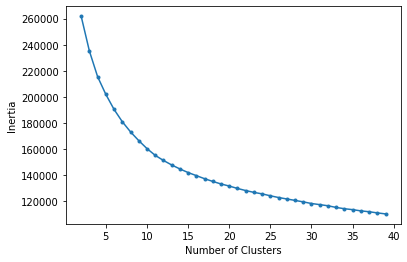

In [79]:
plt.plot(k_values,inertias, marker= '.')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

Text(0, 0.5, 'Silo scores')

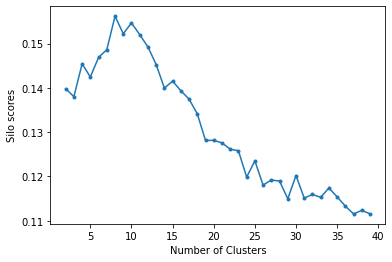

In [80]:
plt.plot(k_values,sil_scores, marker= '.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silo scores")

Text(0, 0.5, 'CH score')

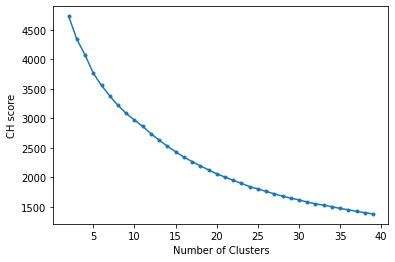

In [81]:
plt.plot(k_values,ch_scores, marker= '.')
plt.xlabel("Number of Clusters")
plt.ylabel("CH score")

#### **8-12 Clusters seems the best for K ( Not good though, low silo score )  looking at silhouttes and inertia**,